In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from bdateutil import isbday
from datetime import datetime,date
import scipy.optimize as optimize
%matplotlib inline

### PART 1: pivot data

In [2]:
df = pd.read_csv('BetaExample.csv')
print(df.head())
df['DATE'].head(3)

       DATE TICKER        RM         R
0  1990/1/2    IBM  0.017799  0.041169
1  1990/1/3    IBM -0.002586  0.008929
2  1990/1/4    IBM -0.008613  0.011378
3  1990/1/5    IBM -0.009756 -0.002500
4  1990/1/8    IBM  0.004514  0.006266


0    1990/1/2
1    1990/1/3
2    1990/1/4
Name: DATE, dtype: object

In [3]:
df = pd.pivot_table(df, index = ['DATE'], columns = ['TICKER'], values = ['R','RM'])
df = df.reset_index()
df.head()

DATE         R                       RM                    
TICKER                 AAPL       IBM TSLA      AAPL       IBM      TSLA
0       1990/1/10 -0.043189 -0.003774  NaN -0.006607 -0.006607 -0.006607
1       1990/1/11 -0.041667  0.008838  NaN  0.003513  0.003513  0.003513
2       1990/1/12  0.000000 -0.020025  NaN -0.024675 -0.024675 -0.024675
3       1990/1/15 -0.007246  0.002554  NaN -0.008619 -0.008619 -0.008619
4       1990/1/16  0.018248  0.020382  NaN  0.011128  0.011128  0.011128

In [4]:
print(df['R']['AAPL'].head(3))
print(df['R'].head(3))
print(df['DATE'].head(3))

0   -0.043189
1   -0.041667
2    0.000000
Name: AAPL, dtype: float64
TICKER      AAPL       IBM  TSLA
0      -0.043189 -0.003774   NaN
1      -0.041667  0.008838   NaN
2       0.000000 -0.020025   NaN
0    1990/1/10
1    1990/1/11
2    1990/1/12
Name: DATE, dtype: object


In [84]:
#grp = df.groupby(['TICKER'])
#print(grp.head())

           DATE TICKER        RM         R
0      1990/1/2    IBM  0.017799  0.041169
1      1990/1/3    IBM -0.002586  0.008929
2      1990/1/4    IBM -0.008613  0.011378
3      1990/1/5    IBM -0.009756 -0.002500
4      1990/1/8    IBM  0.004514  0.006266
6552   1990/1/2   AAPL  0.017799  0.056738
6553   1990/1/3   AAPL -0.002586  0.006711
6554   1990/1/4   AAPL -0.008613  0.003333
6555   1990/1/5   AAPL -0.009756  0.003322
6556   1990/1/8   AAPL  0.004514  0.006623
13104  1990/1/2   TSLA  0.017799       NaN
13105  1990/1/3   TSLA -0.002586       NaN
13106  1990/1/4   TSLA -0.008613       NaN
13107  1990/1/5   TSLA -0.009756       NaN
13108  1990/1/8   TSLA  0.004514       NaN


### PART 2: clean data
#### 1. check for outliers
#### 2. check for business day

In [5]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [25]:
data = pd.read_table('foo.csv', sep = ',')
print(data.head())

        DATE      AAPL       IBM  TSLA        RM
0  1990/1/10 -0.043189 -0.003774   NaN -0.006607
1  1990/1/11 -0.041667  0.008838   NaN  0.003513
2  1990/1/12  0.000000 -0.020025   NaN -0.024675
3  1990/1/15 -0.007246  0.002554   NaN -0.008619
4  1990/1/16  0.018248  0.020382   NaN  0.011128


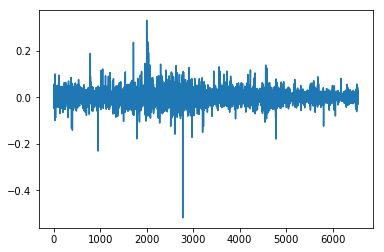

In [26]:
plt.plot(data['AAPL'])

In [27]:
def erase(colnames, data):
    mean = []
    std = []
    for tck in colnames:
        mean.append(data[tck].mean())
        std.append(data[tck].std())
    for i in range(len(data.index)):
        if not isbday(datetime.strptime(data['DATE'][i], '%Y/%m/%d')):
            data = data.drop([i])
            break
        for j in range(3):
            tck = colnames[j]
            if math.isnan(data[tck][i]):
                data = data.drop([i])
                break
            elif abs(data[tck][i] - mean[j]) >= 3 * std[j]:
                data = data.drop([i])
                break
    return data

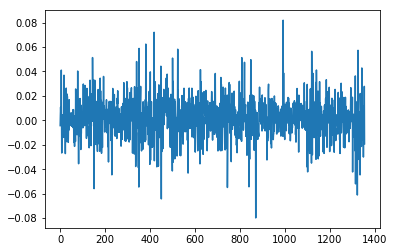

In [28]:
colnames = ['AAPL', 'IBM', 'TSLA']
cleaned_data = erase(colnames, data)
nrow = len(cleaned_data.index)
cleaned_data.index = range(nrow)
plt.plot(cleaned_data['AAPL'])

### PART 3 average return and covariance matrix


In [29]:
subset = cleaned_data[['AAPL', 'IBM', 'TSLA']]
subset.head()

,AAPL,IBM,TSLA
0,-0.004335,0.011182,0.009556
1,0.004387,0.005834,-0.009300
2,0.010767,0.001360,0.000000
3,0.005359,0.003718,0.014822
4,0.007230,0.008050,0.010224


In [30]:
subset.shape

(1355, 3)

In [31]:
np.corrcoef(subset['AAPL'], subset['TSLA'])

array([[ 1.        ,  0.26777924],
       [ 0.26777924,  1.        ]])

In [32]:
print(subset.cov())
print(subset.corr())
Cov = np.array(subset.cov())

          AAPL       IBM      TSLA
AAPL  0.000257  0.000073  0.000123
IBM   0.000073  0.000125  0.000092
TSLA  0.000123  0.000092  0.000823
          AAPL       IBM      TSLA
AAPL  1.000000  0.408593  0.267779
IBM   0.408593  1.000000  0.285787
TSLA  0.267779  0.285787  1.000000


Some other ideas could be:

test for vol.

find mean-reversion, stock GBM and interest rate OU process.

In [33]:
mean = []
std = []
for tck in colnames:
    mean.append(subset[tck].mean())
    std.append(subset[tck].std())
print('mean', mean)
print('std', std)

mean [0.0009691586715867167, 0.00040068856088560896, 0.0014412619926199228]
std [0.016040356310778298, 0.011185657292837162, 0.028693219114464295]


In [34]:
mean = np.array([[mean[0]], [mean[1]], [mean[2]]])
print(mean)

[[ 0.00096916]
 [ 0.00040069]
 [ 0.00144126]]


### PART4: portfolio allocation---closed form

### Assumptions
1. Long only
2. fully invest

### Three optimazations
1. Max return: long the one with the highest mean
2. Min variance
3. mean-variance

In [45]:
# min variance with a constraint
def f2(h):
    h = np.append(h, 1 - sum(h))
    return h.transpose().dot(Cov).dot(h)

initial_guess = np.array([[0], [0]])
res2 = optimize.minimize(f2, initial_guess, tol = 1e-12)
print(res2)

      fun: 0.00011342611544639702
 hess_inv: array([[ 2205.27189817, -1965.54545611],
       [-1965.54545611,  2404.7093364 ]])
      jac: array([ 0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 76
      nit: 11
     njev: 19
   status: 0
  success: True
        x: array([ 0.21247324,  0.76701669])


In [127]:
np.append(res2.x, 1 - sum(res2.x))

array([ 0.21245605,  0.76703532,  0.02050864])

#### mean variance (without cash limit constraint)
the objective function can be written as:
$$
f(h) = h^T r - \frac{1}{2}\lambda h^T C h
$$
where $h$ is the holding vector and $\lambda$ is to describe risk aversion.

Take derivative with respect to $h$ and we have:
$$
\frac{\partial f}{\partial h} = r - \lambda C h
$$
By letting it to zero and solve the equation we get:
$$
h = \frac{1}{\lambda} C^{-1} r
$$

In [47]:
lambd = 1
1 / lambd * np.linalg.inv(Cov).dot(mean)

array([[ 3.0242807 ],
       [ 0.52159522],
       [ 1.23975457]])

In [52]:
def f(h):
    return -h.transpose().dot(mean) + 0.5 * lambd * h.transpose().dot(Cov).dot(h)

cons = [{'type':'ineq', 'fun': lambda x: x[0]},
        {'type':'ineq', 'fun': lambda x: x[1]},
        {'type':'ineq', 'fun': lambda x: x[2]},
        {'type':'eq', 'fun': lambda x: sum(x) - 1}]


initial_guess = np.array([[0], [0], [1]])
#bnds = ((0, 1), (0, 1))
res = optimize.minimize(f, initial_guess, constraints = cons, tol = 1e-12)
print(res)

     fun: array([-0.00106076])
     jac: array([-0.00080928, -0.000314  , -0.00080928,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([  2.73290182e-01,   2.77826807e-18,   7.26709818e-01])


### PART5: portfolio allocation---Monte Carlo

In [231]:
N = 100000
randnum = np.random.rand(N, 3)
path = randnum

In [232]:
total = [sum(randnum[i]) for i in range(N)]
path = [randnum[i] / total[i] for i in range(N)]
path[0]

array([ 0.49812809,  0.13419182,  0.36768009])

#### min variance and mean variance
$$
min\ var = h^T C h
$$

$$
max\ f(h) = h^T (r - r_f) - \frac{1}{2}\lambda h^T C h
$$

In [259]:
min_var = []
mean_var = []
path_ret = []

for i in path:
    #print(i)
    h = np.array([[i[0]], [i[1]], [i[2]]])
    var = h.transpose().dot(Cov).dot(h)
    r = h.transpose().dot(mean)
    f = r - 0.5 * lambd * var
    path_ret.append(r[0][0])
    #print('var', var)
    #print('f', f)
    min_var.append(var[0][0])
    #print('min_var', min_var)
    mean_var.append(f[0][0])


In [260]:
# For min variance
path_min = path[min_var.index(min(min_var))]
print('min variance', path_min)

# For mean variance
path_mean = path[mean_var.index(max(mean_var))]
print('mean variance', path_mean)

min variance [ 0.21187386  0.76832676  0.01979938]
mean variance [  2.68891914e-01   1.64361569e-04   7.30943725e-01]


(0, 0.03)

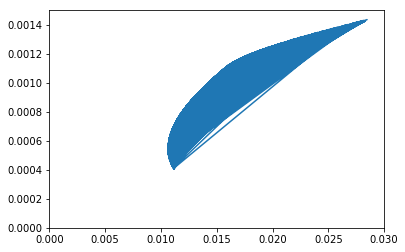

In [268]:
# plot efficient frontier
path_sd = [np.sqrt(num) for num in min_var]
plt.plot(path_sd, path_ret)
plt.ylim([0, 0.0015])
plt.xlim([0,0.03])